In [235]:
# Michael Spearing 
# February 15, 2017
# Data Science Lab 5

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [183]:
# Chapter 3 Question 10
carseats = pd.read_csv('input/Carseats.csv')
carseats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [47]:
# A) Fit a multiple regression model to predict Sales using Price, Urban, and US
est = smf.ols('Sales ~ Price + Urban + US', carseats).fit()
est.summary()
carseats.corr()
regr = skl_lm.LinearRegression()

x = carseats[['Price', 'Urban', 'US']].as_matrix()
x[x=='Yes'] = 1
x[x=='No'] = 0
y = carseats.Sales
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)


[-0.05445885 -0.02191615  1.2005727 ]
13.0434689368


In [8]:
# B) Provide an interpretation of each coefficent in the model. Be careful-
# some of the variables in the model are qualitative

In [9]:
# C) Write out the model in equation form, being careful to handle 
# the qualitative variables properly.

In [10]:
# D) For which of the predictors can you reject the null hypothesis
# H0: βj = 0?

In [11]:
# E) On the basis of your response to the previous question, fit a smaller
# model that only uses the predictors for which there is evidence of 
# association with the outcome.

In [12]:
# F) How well do the models in (a) and (e) fit the data?


In [13]:
# G) Using the model from (e), obtain 95% confidence intervals for 
# the coefficient(s).

In [2]:
# H) Is there evidence of outliers or high leverage observations in the 
# model from (e)?

In [184]:
# Chapter 4 Question 10
weekly = pd.read_csv('./input/weekly.csv')
weekly = weekly.iloc[:,1:]
weekly.info()
weekly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 76.6+ KB


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


-0.0588936170213
0.532519230769
0.0810576923077
0.136711538462
-0.0206153846154
0.570307692308
0.382471698113
0.534230769231
0.478596153846
0.376057692308
-0.15625
-0.180826923077
-0.449788461538
0.403884615385
0.182442307692
0.0658461538462
0.254923076923
0.0104528301887
-0.683711538462
0.406461538462
0.260134615385


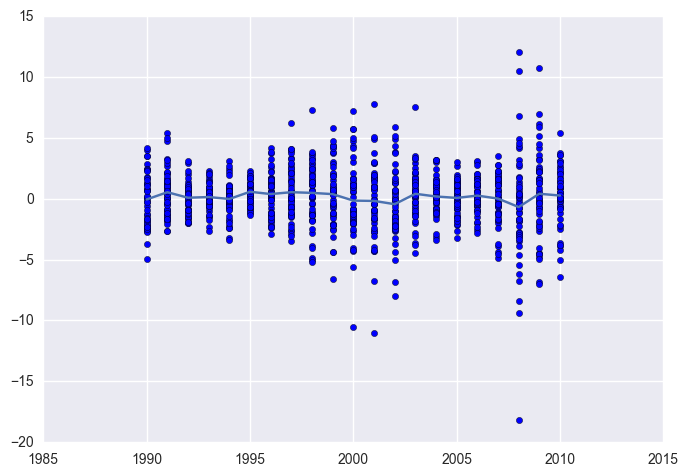

In [233]:
# A) Produce some numerical and graphical summaries of the Weekly 
# data. Do there appear to be any patterns?

#print(weekly.corr())
#scatter_matrix(weekly)
year_avg = [None] *(21)
for i in range(21):
    year_avg[i] = weekly[weekly['Year'] == (i + 1990)]
    year_avg[i] = year_avg[i]['Today']
    year_avg[i] = year_avg[i].mean()
    print(year_avg[i])
plt.plot(range(1990 , 2011),year_avg)
plt.scatter(weekly['Year'],weekly['Today'])
plt.show()

In [187]:
# B) Use the full data set to perform a logistic regression with 
# Direction as the response and the five lag variables plus Volume 
# as predictors. Use the summary function to print the results. Do 
# any of the predictors appear to be statistically significant? If so, 
# which ones?
model_LR = skl_lm.LogisticRegression()
model_LR = model_LR.fit(weekly.iloc[:,1:7], weekly['Direction'])
predicted_LR = model_LR.predict(weekly.iloc[:,1:7])
wrong = 0
for i in range(len(predicted_LR)):
    if(predicted_LR[i] != weekly.iloc[i,8]):
        wrong += 1
        
print("Number of miss classifications: " + str(wrong))
print("Coeficients of predictors: \n" + str(model_LR.coef_))


Number of miss classifications: 476
Coeficients of predictors: 
[[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]]


In [188]:
# C) Compute the confusion matrix and overall fraction of correct 
# predictions. Explain what the confusion matrix is telling you about 
# the types of mistakes made by logistic regression.
cm_LR = confusion_matrix(weekly['Direction'],predicted_LR, labels=['Up','Down'] )
print("Confusion Matrix: ")
print(cm_LR)
print("Fraction Correct: " + str(cm_LR[0,0] + cm_LR[1,1]) + "/" + str(cm_LR.sum()))
print("Percent Correct: " + str(((cm_LR[0,0] + cm_LR[1,1]) / float(cm_LR.sum()))*100))

Confusion Matrix: 
[[558  47]
 [429  55]]
Fraction Correct: 613/1089
Percent Correct: 56.290174472


In [204]:
# D) Now fit the logistic regression model using a training data period 
# from 1990 to 2008, with Lag2 as the only predictor. Compute the 
# confusion matrix and the overall fraction of correct predictions for 
# the held out data (that is, the data from 2009 and 2010).
trainingData = weekly[weekly.Year < 2009]
X_td = trainingData['Lag2'].reshape(-1,1)
y_td = trainingData['Direction']
validationData = weekly[weekly.Year > 2008]
X_vd = validationData['Lag2'].reshape(-1,1)
y_vd = validationData['Direction']



In [205]:
# D) Continued.
model_LR = skl_lm.LogisticRegression()
model_LR.fit(X_td, y_td)
predicted_LR = model_LR.predict(X_vd)
cm_LR = confusion_matrix(y_vd, predicted_LR, labels=["Up","Down"])
print("Confusion Matrix: \n" + str(cm_LR))
print("Fraction Correct: " + str(cm_LR[0,0] + cm_LR[1,1]) + "/" + str(cm_LR.sum()))
print("Percent Correct: " + str(((cm_LR[0,0] + cm_LR[1,1]) / float(cm_LR.sum()))*100))

Confusion Matrix: 
[[56  5]
 [34  9]]
Fraction Correct: 65/104
Percent Correct: 62.5


In [206]:
# E) Repeat (d) using LDA.
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_td,y_td)
predicted_LDA = model_LDA.predict(X_vd)
cm_LDA = confusion_matrix(y_vd, predicted_LDA, labels = ["Up", "Down"])
print("Confusion Matrix: \n" + str(cm_LDA))
print("Fraction Correct: " + str(cm_LDA[0,0] + cm_LDA[1,1]) + "/" + str(cm_LDA.sum()))
print("Percent Correct: " + str(((cm_LDA[0,0] + cm_LDA[1,1]) / float(cm_LDA.sum()))*100))

Confusion Matrix: 
[[56  5]
 [34  9]]
Fraction Correct: 65/104
Percent Correct: 62.5


In [234]:
# F) Repeat (d) using QDA.
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_td,y_td)
predicted_QDA = model_QDA.predict(X_vd)
cm_QDA = confusion_matrix(y_vd, predicted_QDA, labels = ["Up", "Down"])
print("Confusion Matrix: \n" + str(cm_QDA))
print("Fraction Correct: " + str(cm_QDA[0,0] + cm_QDA[1,1]) + "/" + str(cm_QDA.sum()))
print("Percent Correct: " + str(((cm_QDA[0,0] + cm_QDA[1,1]) / float(cm_QDA.sum()))*100))

Confusion Matrix: 
[[61  0]
 [43  0]]
Fraction Correct: 61/104
Percent Correct: 58.6538461538


In [266]:
# G) Repeat (d) using KNN with K = 1.
k = 4
model_KNN = KNeighborsClassifier(n_neighbors = k)
model_KNN = model_KNN.fit(X_td, y_td)
predicted_KNN = model_KNN.predict(X_vd)
cm_KNN = confusion_matrix(y_vd, predicted_KNN, labels = ["Up","Down"])
print("Confusion Matrix: \n" + str(cm_KNN))
print("Fraction Correct: " + str(cm_KNN[0,0] + cm_KNN[1,1]) + "/" + str(cm_KNN.sum()))
print("Percent Correct: " + str(((cm_KNN[0,0] + cm_KNN[1,1]) / float(cm_KNN.sum()))*100))

Confusion Matrix: 
[[34 27]
 [17 26]]
Fraction Correct: 60/104
Percent Correct: 57.6923076923


In [13]:
# H) Which of these methods appears to provide the best results on
# this data?

In [267]:
# I) Experiment with different combinations of predictors, including 
# possible transformations and interactions, for each of the methods. 
# Report the variables, method, and associated confusion matrix that 
# appears to provide the best results on the held out data. Note that 
# you should also experiment with values for K in the KNN classifier.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB
  default student      balance       income
0      No      No   729.526495  44361.62507
1      No     Yes   817.180407  12106.13470
2      No      No  1073.549164  31767.13895
3      No      No   529.250605  35704.49394
4      No      No   785.655883  38463.49588
          balance    income
balance  1.000000 -0.152243
income  -0.152243  1.000000


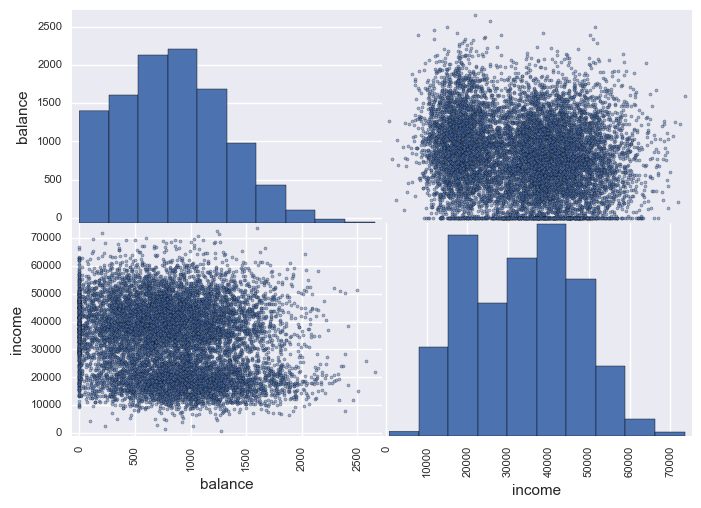

In [275]:
# Chapter 5 Problem 5
# Estimate the test error of this logistic regression model using the 
# validation set approach. Do not forget to set a random seed before 
# beginning your analysis
default = pd.read_csv('./input/Default.csv')
default = default.iloc[:,1:]
default.info()
print(default.head())
print(default.corr())
scatter_matrix(default)
plt.show()

In [284]:
# A) Fit a logistic regression model that uses
# income and balance to predict default.
model_LR = skl_lm.LogisticRegression()
model_LR = model_LR.fit(default.iloc[:,2:], default.iloc[:,0])


In [352]:
# B) Using the validation set approach, estimate the test error of this
# model. In order to do this, you must perform the following steps:
# i. Split the sample set into a training set and a validation set.
trainingFraction = 0.90
trainingBound = int(len(default)*trainingFraction)
X_td = default.iloc[:trainingBound,2:]
X_vd = default.iloc[trainingBound:,2:]
y_td = default.iloc[:trainingBound,0]
y_vd = default.iloc[trainingBound:,0]

# ii. Fit a multiple logistic regression model using only the training
# observations.
model_LR = skl_lm.LogisticRegression()
model_LR = model_LR.fit(X_td, y_td)

model_LDA = LinearDiscriminantAnalysis()
model_LDA = model_LDA.fit(X_td, y_td)
predicted_LR = model_LR.predict(X_vd)
predicted_LDA = model_LDA.predict(X_vd)

# iii. Obtain a prediction of default status for each individual in the 
# validation set by computing the posterior probability of default for 
# that individual, and classifying the individual to the default category 
# if the posterior probability is greater than 0.5.

pi = [None] * 2
prob = model_LR.predict_proba(X_vd)

posterior = len(X_vd) * [None]
pi[0] = (y_td[y_td == 'Yes'].count()) / float(trainingBound)
pi[1] = (y_td[y_td == 'No'].count()) / float(trainingBound)

for x in range(len(X_vd)):
    posterior[x] = pi[0] * prob[x,0] / ((pi[0]*prob[x,0]) + pi[1]*(prob[x,1]))
    if(posterior[x] > 0.5):
        posterior[x] = 'Yes'
    else:
        posterior[x] = 'No'
# iv. Compute the validation set error, which is the fraction of the 
# observations in the validation set that are misclassified.
cm = confusion_matrix(y_vd, posterior)
print("Confusion Matrix: \n" + str(cm))
print("Fraction Correct: " + str(cm[0,0] + cm[1,1]) + "/" + str(cm.sum()))
print("Percent Correct: " + str(((cm[0,0] + cm[1,1]) / float(cm.sum()))*100))

Confusion Matrix: 
[[380 584]
 [ 15  21]]
Fraction Correct: 401/1000
Percent Correct: 40.1
